In [1]:
import pickle as pkl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import copulagp.marginal as mg

In [32]:
session = 'M7_D21_2020-11-26_16-09-48'
data = pd.read_pickle(f'{session}.pkl')
data.iloc[2]

session_id                                   M7_D21_2020-11-26_16-09-48
cluster_id                                                            9
mean_firing_rate                                              35.845934
brain_region                                                      [MEC]
max_trial_number                                                    487
firing_times          [671.0, 2864.0, 3116.0, 5685.0, 6040.0, 6794.0...
x_position_cm         [95.875, 96.9375, 96.75, 99.375, 99.375, 101.5...
trial_number          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
trial_type            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
spike_rate_in_time    [[21.79213012464343, 29.838882078138344, 38.37...
rewarded_trials       [1, 5, 9, 13, 17, 21, 25, 29, 37, 41, 45, 49, ...
rewarded_locations    [94.5, 95.5, 94.5, 91.5, 95.5, 89.5, 91.5, 104...
Name: 362, dtype: object

In [37]:
session_id=0
[ds_rate, ds_vel, ds_pos, trial_num, trial_type] = data.iloc[session_id].spike_rate_in_time
ds_pos

array([ 79.66412828,  94.7794726 , 105.55287143, ..., 126.3818896 ,
       111.58900251,  88.35346453])

Text(0, 0.5, 'vel, cm/s?')

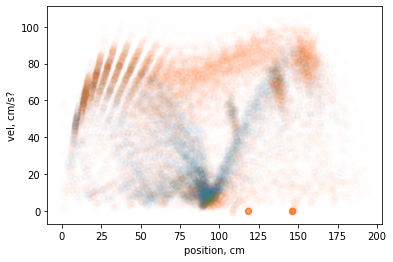

In [27]:
plt.scatter(ds_pos[trial_type==0],ds_vel[trial_type==0],alpha=0.01)
plt.scatter(ds_pos[trial_type==1],ds_vel[trial_type==1],alpha=0.01)
plt.xlabel("position, cm")
plt.ylabel("vel, cm/s?")

(array([ 379., 1184., 1349.,  954.,  677.,  519.,  529.,  567.,  578.,
         673.,  783.,  912., 1092., 1331., 1405., 1223.,  826.,  348.,
         141.,   14.]),
 array([ -1.69409204,   3.67752137,   9.04913477,  14.42074818,
         19.79236159,  25.163975  ,  30.53558841,  35.90720181,
         41.27881522,  46.65042863,  52.02204204,  57.39365545,
         62.76526885,  68.13688226,  73.50849567,  78.88010908,
         84.25172249,  89.62333589,  94.9949493 , 100.36656271,
        105.73817612]),
 <a list of 20 Patch objects>)

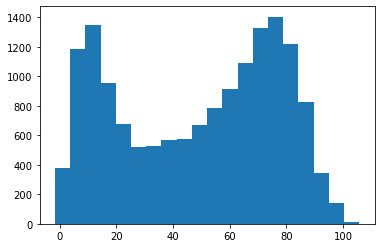

In [5]:
plt.hist(ds_vel,bins=20)

In [6]:
# %time u_vel_t0 = mg.fast_signal2uniform(ds_vel[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50,old=True)
# %time u_rate_t0 = mg.zeroinflated_signal2uniform(ds_rate[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50)
# %time u_vel_t1 = mg.fast_signal2uniform(ds_vel[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50,old=True)
# %time u_rate_t1 = mg.zeroinflated_signal2uniform(ds_rate[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50)

CPU times: user 534 ms, sys: 26.7 ms, total: 560 ms
Wall time: 558 ms
CPU times: user 1.87 s, sys: 43.1 ms, total: 1.92 s
Wall time: 1.91 s
CPU times: user 819 ms, sys: 36.9 ms, total: 856 ms
Wall time: 840 ms
CPU times: user 4.71 s, sys: 65.5 ms, total: 4.78 s
Wall time: 4.75 s


In [39]:
u_vel_t0, u_rate_t0, u_vel_t1, u_rate_t1 = [],[],[],[]
for session_id in tqdm(range(len(data))):
    [ds_rate, ds_vel, ds_pos, _, trial_type] = data.iloc[session_id].spike_rate_in_time
    if session_id==0:
        ds_vel_all=ds_vel
        u_vel_t0_all = mg.fast_signal2uniform(ds_vel[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50,old=True)
        u_vel_t1_all = mg.fast_signal2uniform(ds_vel[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50,old=True)
    else:
        assert np.allclose(ds_vel_all,ds_vel)
    u_vel_t0.append(u_vel_t0_all)
    u_rate_t0.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==0],ds_pos[trial_type==0],numPointsPerSigma=50))
    u_vel_t1.append(u_vel_t1_all)
    u_rate_t1.append(mg.zeroinflated_signal2uniform(ds_rate[trial_type==1],ds_pos[trial_type==1],numPointsPerSigma=50))
data['u_vel_t0']=u_vel_t0
data['u_rate_t0']=u_rate_t0
data['u_vel_t1']=u_vel_t1
data['u_rate_t1']=u_rate_t1

  0%|          | 0/13 [00:00<?, ?it/s]

(array([[502., 489., 565., 531., 533., 525., 583., 532., 533., 576.],
        [382., 457., 584., 517., 537., 533., 594., 547., 579., 639.],
        [477., 549., 523., 565., 543., 523., 563., 534., 571., 521.],
        [351., 573., 555., 511., 569., 581., 514., 530., 569., 616.],
        [457., 570., 517., 566., 524., 519., 577., 534., 552., 553.],
        [435., 210., 625., 567., 566., 524., 600., 558., 618., 666.],
        [467., 545., 511., 527., 546., 588., 542., 516., 558., 569.],
        [309., 575., 546., 554., 559., 522., 544., 541., 590., 629.],
        [470., 555., 512., 570., 533., 544., 570., 524., 524., 567.],
        [488., 555., 522., 581., 537., 559., 554., 458., 525., 590.],
        [477., 496., 575., 537., 516., 539., 589., 551., 528., 561.],
        [372., 389., 580., 557., 542., 561., 557., 567., 593., 651.],
        [517., 503., 552., 548., 473., 557., 475., 530., 495., 719.]]),
 array([9.04821154e-07, 1.00000814e-01, 2.00000724e-01, 3.00000633e-01,
        4.000005

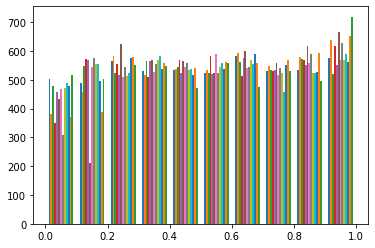

In [33]:
plt.hist(u_rate_t0)